<a href="https://colab.research.google.com/github/dkaskgkdua/ai_study/blob/main/ai_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃 알고리즘

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
# 정확도
# kn.score(fish_data, fish_target)

kn.predict([[30, 600]])

# plt.scatter(bream_length, bream_weight)
# plt.scatter(smelt_length, smelt_weight)
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

array([1])

# 넘파이 활용해서 산점도 그리기, 평가

### 파이썬 리스트를 넘파이 배열로 바꾸기
- np.array()

### 넘파이 배열 크기, 특성 추가
- input_arr.shape
  => (49, 2)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 산점도 그리기
# plt.scatter(train_input[:,0], train_input[:,1])
# plt.scatter(test_input[:,0], test_input[:, 1])
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()



kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

# 값 1.0 (정확도 100)
# kn.score(test_input, test_target)

kn.predict(test_input)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

#데이터 전처리
올바른 결과 도출을 위해 데이터 사용 전 전처리 과정을 거침.

## 데이터 전처리가 필요한 경우
아래와 같은 케이스는 (25, 150) 데이터가 1을 기대했는데 0인 경우다.
산점도로 보면 삼각형과 마름모 4개의 거리가 꽤 되는데 distance가 92, 130이다. 130보단 훨 멀어야 할 것 같은데 왜 그럴까?
- 답은 x축과 y축의 범위가 달라서 그렇다.
- 이를 두 특성의 스케일이 다르다고 한다.
- k-최근접 이웃도 거리 기반이라 특성값을 일정한 기준으로 맞추어야 하는데 이를 데이터 전처리라고 부른다.



[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
distances :  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
가장 가까운 샘플 :  [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
가장 가까운 샘플 종류  [[1. 0. 0. 0. 0.]]


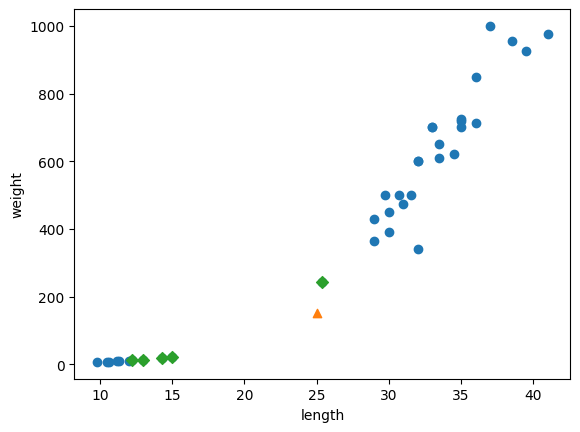

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)
#  random_state는 랜덤 시드 지정
# stratify는 샘플링 편향을 막기 위해 해당 데이터를 클래스 비율에 맞게 데이터를 나눠줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

print(test_target)

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
distances, indexes = kn.kneighbors([[25, 150]])

print("distances : " , distances)
print("가장 가까운 샘플 : " , train_input[indexes])
print("가장 가까운 샘플 종류 " , train_target[indexes])
# 빙어가 4개나 된다.

# 산점도 그리기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



## 표준점수(데이터 전처리 방법 중 하나)
표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

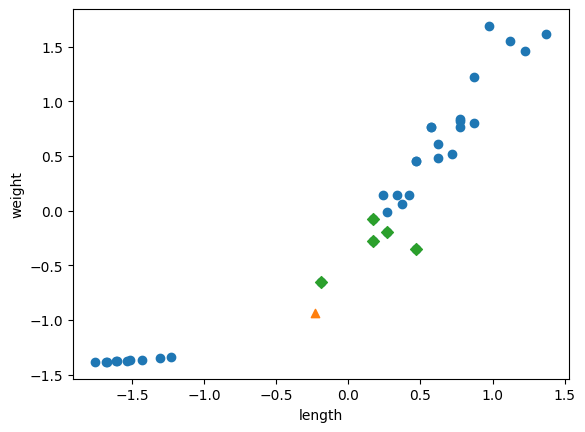

[1.]


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))

# print(fish_data[:5])

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# print(fish_target)
#  random_state는 랜덤 시드 지정
# stratify는 샘플링 편향을 막기 위해 해당 데이터를 클래스 비율에 맞게 데이터를 나눠줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 42)

# 평균
mean = np.mean(train_input, axis=0)
# 표준편차
std = np.std(train_input, axis=0)

print(mean,std)

train_scaled = (train_input - mean) / std

kn.fit(train_scaled, train_target)

print(train_scaled)

new = ([25, 150] - mean) / std

# 가장 가까운 이웃 5 확인용
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련용
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

# 임의 테스트
print(kn.predict([new]))